<a href="https://colab.research.google.com/github/Vipriya24/project-alpha/blob/main/ClusteringVisionData_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering and Visualisation Student Vision using Folium Maps**

In [ ]:
import numpy as np
import pandas as pd

import folium
from folium import plugins

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('/content/sstudent_engagement_dataset.csv')
df.head()

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
0,1,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy,0
1,1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard,1
2,1,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard,0
3,1,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy,2
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2


In [ ]:
df['Learning_Content_Type'].value_counts()

,count
Learning_Content_Type,
Text,1031
Video,994
Interactive,975


In [ ]:
df['Difficulty_Level'].value_counts()

,count
Difficulty_Level,
Medium,1042
Hard,996
Easy,962


**DATA PREP FOR k-MEANS CLUSTERING**

In [ ]:
df = df[(df['Difficulty_Level'] != 'Easy') & (df['Difficulty_Level'] != 'Hard')]
df.head()

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2
5,1,0.527938,1.336006,1.705636,2.358909,0.928934,2.177318,17,622,140.630162,Interactive,Medium,2
7,1,1.170252,0.580574,2.159546,0.933658,0.988269,1.544637,26,327,288.289826,Video,Medium,2
11,2,1.361567,1.233410,2.200645,1.778001,1.635539,2.479119,17,560,262.244516,Interactive,Medium,2
16,2,0.528094,0.627119,1.549008,1.661148,1.625170,1.395480,26,404,82.703434,Video,Medium,1


In [ ]:
df_types = df[['Blink_Rate','Learning_Content_Type']]

df_types.head()

,Blink_Rate,Learning_Content_Type
4,19,Video
5,17,Interactive
7,26,Video
11,17,Interactive
16,26,Video


In [ ]:
types = pd.get_dummies(df_types['Learning_Content_Type'])

types['Blink_Rate'] = df_types['Blink_Rate']

types = types.groupby('Blink_Rate').sum().reset_index()

types.head()

,Blink_Rate,Interactive,Text,Video
0,10,23,17,19
1,11,15,12,14
2,12,17,18,19
3,13,24,20,8
4,14,19,15,21


**k-MEANS CLUSTERING**

In [ ]:
codes = types[['Blink_Rate']]
types.drop('Blink_Rate', axis=1, inplace=True)

In [ ]:
distortions = []

K = range(1,4)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(types)
    distortions.append(kmean.inertia_)

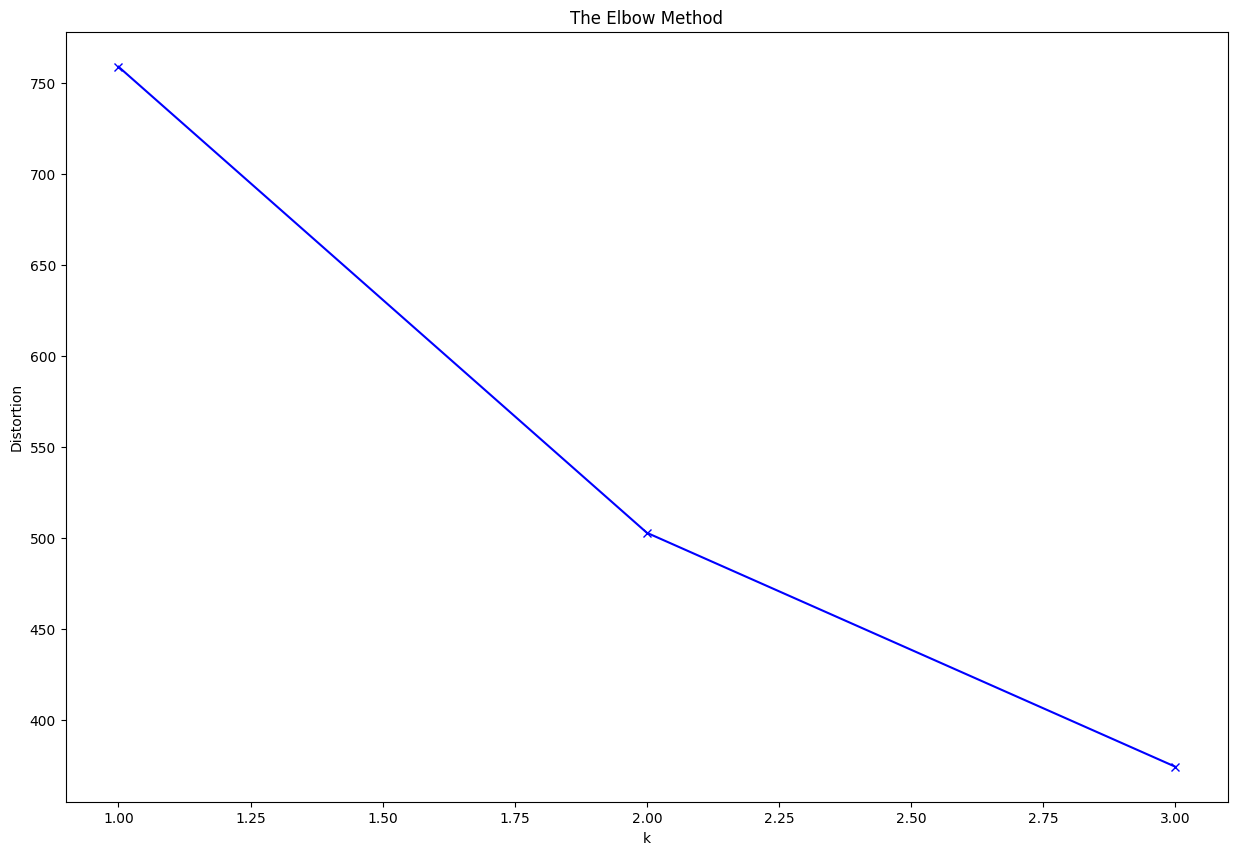

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(types)

codes['cluster'] = kmeans.labels_
codes.head()

<ipython-input-13-c664c3c964f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codes['cluster'] = kmeans.labels_


,Blink_Rate,cluster
0,10,2
1,11,0
2,12,1
3,13,2
4,14,0


In [ ]:
pca = PCA().fit(types)
pca_types = pca.transform(types)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 54.106489708665116

 2 º: 25.317426393980362

 3 º: 20.57608389735451
Total sum (%):  99.99999999999999
Explained variance of the first two components (%):  54.106489708665116


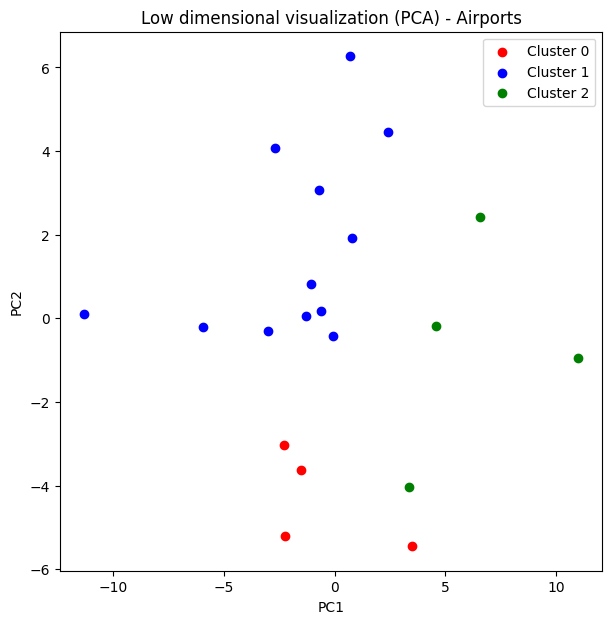

In [ ]:
c0 = []
c1 = []
c2 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])


c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)

plt.figure(figsize=(7,7))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA) - Airports');

In [ ]:
types['cluster']  = kmeans.labels_

types.head()

,Interactive,Text,Video,cluster
0,23,17,19,2
1,15,12,14,0
2,17,18,19,1
3,24,20,8,2
4,19,15,21,0


In [ ]:
types.groupby('cluster').mean()

,Interactive,Text,Video
cluster,,,
0,18.500000,13.250000,17.000000
1,14.666667,18.083333,18.166667
2,22.750000,20.500000,15.750000


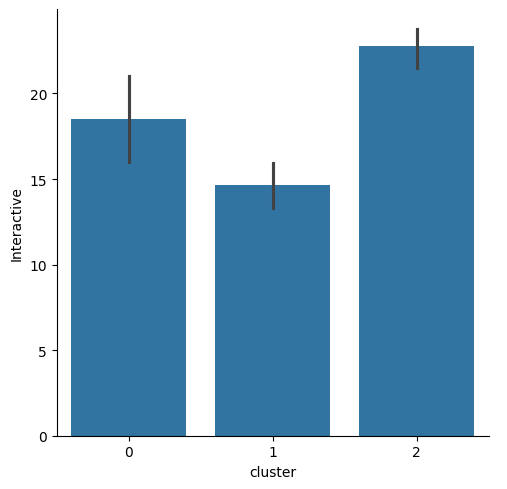

In [ ]:
sns.catplot(x='cluster', y='Interactive', data=types, kind='bar');

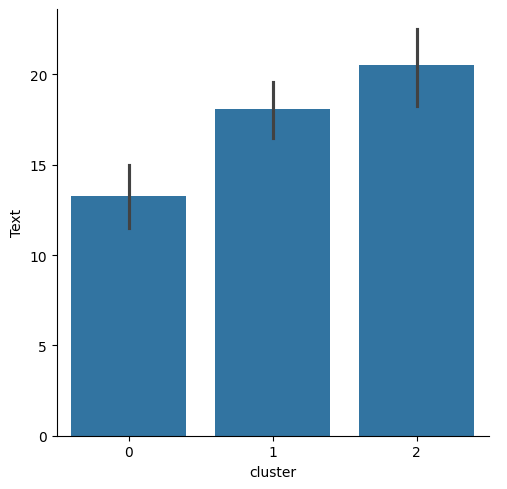

In [ ]:
sns.catplot(x='cluster', y='Text', data=types, kind='bar');

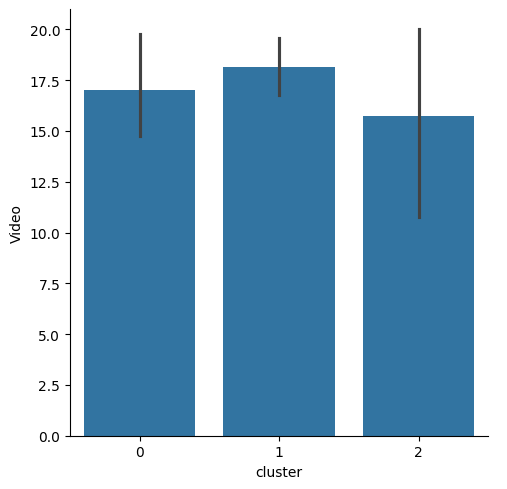

In [ ]:
sns.catplot(x='cluster', y='Video', data=types, kind='bar');

In [ ]:
latitude = 38.500000
longitude = -95.665
map_USA = folium.Map(location=[latitude, longitude], zoom_start=4)
map_USA

In [ ]:
vision = df[['Blink_Rate', 'Fixation_Duration','Saccade_Velocity']]
vision.head()

,Blink_Rate,Fixation_Duration,Saccade_Velocity
4,19,307,185.129183
5,17,622,140.630162
7,26,327,288.289826
11,17,560,262.244516
16,26,404,82.703434


In [ ]:
number_of_occurences = pd.DataFrame(vision['Blink_Rate'].value_counts())
number_of_occurences.reset_index(inplace=True)
number_of_occurences.columns = ['Blink_Rate', 'Count']
number_of_occurences.head()

,Blink_Rate,Count
0,23,66
1,15,59
2,10,59
3,24,55
4,29,55


In [ ]:
number_of_occurences = number_of_occurences.merge(vision.drop_duplicates())

number_of_occurences = number_of_occurences.merge(codes)

number_of_occurences.head()

,Blink_Rate,Count,Fixation_Duration,Saccade_Velocity,cluster
0,23,66,370,287.267541,2
1,23,66,231,173.701923,2
2,23,66,772,259.411353,2
3,23,66,473,254.682604,2
4,23,66,643,107.664965,2


In [ ]:
occurences = folium.map.FeatureGroup()
n_mean = number_of_occurences['Count'].mean()

for rate, fix, number, count in zip(number_of_occurences['Blink_Rate'],
                                         number_of_occurences['Fixation_Duration'],
                                         number_of_occurences['Saccade_Velocity'],
                                         number_of_occurences['Count'],
                                         ):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [rate, fix],
            radius=number/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip = str(number)+','+str(count)
        )
    )

map_USA.add_child(occurences)

In [ ]:
print(vision.columns)

Index(['Blink_Rate', 'Fixation_Duration', 'Saccade_Velocity'], dtype='object')


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for rate, fix, number, count,cluster in zip(
    vision['Blink_Rate'],
    vision['Fixation_Duration'],
    vision['Saccade_Velocity'],
    number_of_occurences['Count'],
    number_of_occurences['cluster']
    ):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [rate, fix],  # Change this if lat/lon data is available
        radius=5,
        tooltip=f"{number}, {count} - Cluster {cluster}",
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters